## Подготовка

#### Установка библиотеки cupychecker

Библиотека проверяет правильность кода
```bash
pip install --index-url https://test.pypi.org/simple cupychecker
```
Нам нужна magic команда `run`

#### Запуск remote coderunner

coderunner — сервис, в котором запускается код. Сервис возвращает stdoout и stderr

```python
os.environ["PYRUNNER"] = "http://python-exercise.python-exercise-prod.svc.cluster.local"
```

## Использование

In [1]:
pip install --index-url https://test.pypi.org/simple cupychecker

Looking in indexes: https://test.pypi.org/simple
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from cupychecker.magic_runner import run
import os

os.environ["PYRUNNER"] = "http://python-exercise.python-exercise-prod.svc.cluster.local"

## WEEK 2 FULL

### Задание 1

 1. Создай словарь, в котором ключами будут будущие названия колонок в таблице, а значениями — списки с&nbsp;соответствующими значениями колонок.

 2. Создай датафрейм с помощью словаря из первого пункта.

 3. Выведи количество столбцов и строк в датафрейме, а также типы данных колонок.

 4. Сделай поле с идентификатором клиента индексом датафрейма.

Описание проверки для преподавателя:

>task_1.yaml
```yaml
id: "1"
description: "Создай словарь, в котором ключами будут ..."
checks:
  # Проверка на вызов функции DataFrame
  - type: call
    expected:
      func: "DataFrame"
  # Проверка на вызов функции head() в аргументом 3. Ожидается head(3)
  - type: call
    expected:
      func: "head"
      args:
        - 3
   #  Ожидается вызов set_index('id_client', inplace=True)
  - type: call
    expected:
      func: "set_index"
      args:
        - "id_client"
        - ["inplace", True]
```

In [ ]:
%%run --module 2 --task 1

import pandas as pd

client_list = [111,112,113,114,115,116,117,118,119,120]
points_list = [1,2,3,4,3,3,2,1,2,3]
pay_list = [150,290,1000,1200,900,850,300,2000,2100,960]
date_pay_list = ['2025-01-06','2025-02-06','2025-01-15','2025-02-01','2025-01-13','2025-01-22','2025-01-06','2025-02-08','2025-02-09','2025-02-03']
comment_list = ['89169999999', 'dd15@gmail.com', '-', '--', '89179999999','ss13@gmail.com','sd1@gmail.com','Progr1','Progr2','Progr3']

dict_data = {  'id_client':client_list
             , 'id_point': points_list
             , 'amt_pay': pay_list
             , 'date_pay': date_pay_list
             , 'comment': comment_list
            }

df = pd.DataFrame(dict_data)
df.set_index('id_client', inplace = False)

print(df.head(10))

Namespace(module=2, task=1, plot=None, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')


```
   id_client  id_point  amt_pay    date_pay         comment
0        111         1      150  2025-01-06     89169999999
1        112         2      290  2025-02-06  dd15@gmail.com
2        113         3     1000  2025-01-15               -
3        114         4     1200  2025-02-01              --
4        115         3      900  2025-01-13     89179999999
5        116         3      850  2025-01-22  ss13@gmail.com
6        117         2      300  2025-01-06   sd1@gmail.com
7        118         1     2000  2025-02-08          Progr1
8        119         2     2100  2025-02-09          Progr2
9        120         3      960  2025-02-03          Progr3

```

### Задание 2

Выведи все платежи строго больше $1000$ рублей, которые были произведены в торговых точках $1$ и $2$.

Отсортируй результат по платежу от большего к меньшему.

>task_2.yaml
```yaml
checks:
  - type: call
    expected:
      func: "DataFrame"
  #  Ищем в коде выражение df['id_point']<=2
  - type: contains
    expected:
      code: >
        df['id_point']<=2
  - type: contains
    expected:
      code: >
        df["amt_pay"] > 1000
  - type: call
    expected:
      func: "sort_values"
      args:
        - "amt_pay"
        - ["ascending", False]
```

In [ ]:
%%run --module 2 --task 2
import pandas as pd

client_list = [111,112,113,114,115,116,117,118,119,120]
points_list = [1,2,3,4,3,3,2,1,2,3]
pay_list = [150,290,1000,1200,900,850,300,2000,2100,960]
date_pay_list = ['2025-01-06','2025-02-06','2025-01-15','2025-02-01','2025-01-13','2025-01-22','2025-01-06','2025-02-08','2025-02-09','2025-02-03']
comment_list = ['89169999999', 'dd15@gmail.com', '-', '--', '89179999999','ss13@gmail.com','sd1@gmail.com','Progr1','Progr2','Progr3']
dict_data = {  'id_client':client_list
           , 'id_point': points_list
           , 'amt_pay': pay_list
           , 'date_pay': date_pay_list
           , 'comment': comment_list
          }

df = pd.DataFrame(dict_data)
df.set_index('id_client', inplace = True)

print(df[(df['amt_pay']>1000) & (df['id_point']<=2)].sort_values('amt_pay', ascending = True))

Namespace(module=2, task=2, plot=None, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')


```
           id_point  amt_pay    date_pay comment
id_client                                       
118               1     2000  2025-02-08  Progr1
119               2     2100  2025-02-09  Progr2

```

### Задание 3

Выведи самый большой платёж в торговой точке номер 3.

In [ ]:
%%run --module 2 --task 3
import pandas as pd

client_list = [111,112,113,114,115,116,117,118,119,120]
points_list = [1,2,3,4,3,3,2,1,2,3]
pay_list = [150,290,1000,1200,900,850,300,2000,2100,960]
date_pay_list = ['2025-01-06','2025-02-06','2025-01-15','2025-02-01','2025-01-13','2025-01-22','2025-01-06','2025-02-08','2025-02-09','2025-02-03']
comment_list = ['89169999999', 'dd15@gmail.com', '-', '--', '89179999999','ss13@gmail.com','sd1@gmail.com','Progr1','Progr2','Progr3']
dict_data = {  'id_client':client_list
           , 'id_point': points_list
           , 'amt_pay': pay_list
           , 'date_pay': date_pay_list
           , 'comment': comment_list
          }

df = pd.DataFrame(dict_data)
df.set_index('id_client', inplace = True)

print(df[df['id_point']==4].sort_values('amt_pay', ascending = False).head(1)['amt_pay'])

Namespace(module=2, task=3, plot=None, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')


```
id_client
114    1200
Name: amt_pay, dtype: int64

```

### Задание 4

 1. С помощью функции *loc* выведи платежи и комментарии, соответствующие идентификаторам клиента $112$ и $113$.

 2. Сделай то же самое с помощью функции *iloc*.

 3. Убедись, что вывод получается одинаковый.

In [ ]:
%%run --module 2 --task 4
import pandas as pd

client_list = [111,112,113,114,115,116,117,118,119,120]
points_list = [1,2,3,4,3,3,2,1,2,3]
pay_list = [150,290,1000,1200,900,850,300,2000,2100,960]
date_pay_list = ['2025-01-06','2025-02-06','2025-01-15','2025-02-01','2025-01-13','2025-01-22','2025-01-06','2025-02-08','2025-02-09','2025-02-03']
comment_list = ['89169999999', 'dd15@gmail.com', '-', '--', '89179999999','ss13@gmail.com','sd1@gmail.com','Progr1','Progr2','Progr3']
dict_data = {  'id_client':client_list
           , 'id_point': points_list
           , 'amt_pay': pay_list
           , 'date_pay': date_pay_list
           , 'comment': comment_list
          }

df = pd.DataFrame(dict_data)
df.set_index('id_client', inplace = True)

print(df.loc[[112,113]])
print(df.iloc[[1, 2]])

Namespace(module=2, task=4, plot=None, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')


```
           id_point  amt_pay    date_pay         comment
id_client                                               
112               2      290  2025-02-06  dd15@gmail.com
113               3     1000  2025-01-15               -
           id_point  amt_pay    date_pay         comment
id_client                                               
112               2      290  2025-02-06  dd15@gmail.com
113               3     1000  2025-01-15               -

```

### Задание 5

 1. Приведи столбец с датой платежа к формату даты.

 2. Создай в датафрейме новый столбец с датой платежа, приведённой к началу месяца.

 3. Создай в датафрейме новый столбец с номерами месяца.

In [ ]:
%%run --module 2 --task 5

import pandas as pd

client_list = [111,112,113,114,115,116,117,118,119,120]
points_list = [1,2,3,4,3,3,2,1,2,3]
pay_list = [150,290,1000,1200,900,850,300,2000,2100,960]
date_pay_list = ['2025-01-06','2025-02-06','2025-01-15','2025-02-01','2025-01-13','2025-01-22','2025-01-06','2025-02-08','2025-02-09','2025-02-03']
comment_list = ['89169999999', 'dd15@gmail.com', '-', '--', '89179999999','ss13@gmail.com','sd1@gmail.com','Progr1','Progr2','Progr3']
dict_data = {  'id_client':client_list
          , 'id_point': points_list
          , 'amt_pay': pay_list
          , 'date_pay': date_pay_list
          , 'comment': comment_list
          }
df = pd.DataFrame(dict_data)
df.set_index('id_client', inplace = True)

df['date_pay'] = pd.to_datetime(df['date_pay'])
df['month_int'] = df['date_pay'].dt.month
df['month_dat'] = df['date_pay'].dt.to_period("W").dt.to_timestamp()

print(df.head(3))

Namespace(module=2, task=5, plot=None, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')


```
           id_point  amt_pay   date_pay         comment  month_int  month_dat
id_client                                                                    
111               1      150 2025-01-06     89169999999          1 2025-01-06
112               2      290 2025-02-06  dd15@gmail.com          2 2025-02-03
113               3     1000 2025-01-15               -          1 2025-01-13

```

### Задание 6

 1. Выведи строки, в которых комментарий представляет собой адрес электронной почты (проверка по содержанию символа собаки).

In [ ]:
%%run --module 2 --task 6

import pandas as pd

client_list = [111,112,113,114,115,116,117,118,119,120]
points_list = [1,2,3,4,3,3,2,1,2,3]
pay_list = [150,290,1000,1200,900,850,300,2000,2100,960]
date_pay_list = ['2025-01-06','2025-02-06','2025-01-15','2025-02-01','2025-01-13','2025-01-22','2025-01-06','2025-02-08','2025-02-09','2025-02-03']
comment_list = ['89169999999', 'dd15@gmail.com', '-', '--', '89179999999','ss13@gmail.com','sd1@gmail.com','Progr1','Progr2','Progr3']
dict_data = {  'id_client':client_list
          , 'id_point': points_list
          , 'amt_pay': pay_list
          , 'date_pay': date_pay_list
          , 'comment': comment_list
          }

df = pd.DataFrame(dict_data)
df.set_index('id_client', inplace = True)

df['date_pay'] = pd.to_datetime(df['date_pay'])
df['month_int'] = df['date_pay']
df['month_dat'] = df['date_pay'].dt.to_period('M').dt.to_timestamp()

print(df[df['comment'].str.contains('@')])

Namespace(module=2, task=6, plot=None, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')


```
           id_point  amt_pay   date_pay         comment  month_int  month_dat
id_client                                                                    
112               2      290 2025-02-06  dd15@gmail.com 2025-02-06 2025-02-01
116               3      850 2025-01-22  ss13@gmail.com 2025-01-22 2025-01-01
117               2      300 2025-01-06   sd1@gmail.com 2025-01-06 2025-01-01

```

## Графики

### Задание 1 SEABORN

Построй распределение счетов (total_bill) с помощью гистограммы Seaborn.

> task_1.yaml

```yaml
checks:
  - type: call
    expected:
      func: "histplot"
      args:
        - "df['total_bill']"
        - ["bins", 20]
  - type: call
    expected:
      func: "title"
      args:
        - "Распределение счетов"
    message: "Подпишите график: `Распределение счетов`"
  - type: call
    expected:
      func: "xlabel"
      args:
        - "Сумма счета"
    message: "Подпишите ось X"
  - type: call
    expected:
      func: "ylabel"
      args:
        - "Частота"
    message: "Подпишите ось Y"
  - type: call
    expected:
      func: "show"
    message: "Выведите график"
```

Namespace(module=3, task=1, plot=True, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')


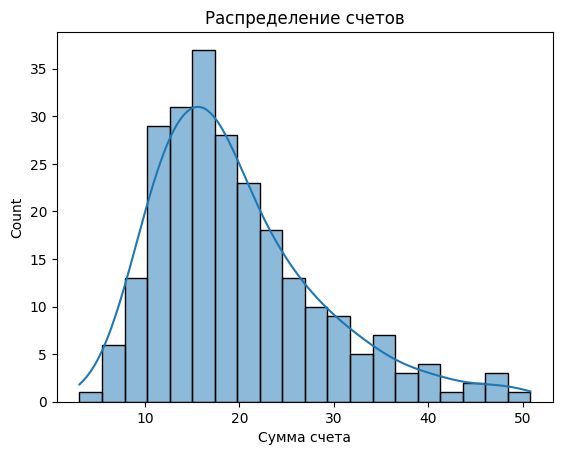

In [ ]:
%%run --module=3 --task=1 --plot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

sns.histplot(df['total_bill'], bins=20, kde=True)
plt.title("Распределение счетов")
plt.xlabel("Сумма счета")
# plt.ylabel("Частота")
plt.show()

### Задание 2 PLOTLY

Построй с помощью Plotly scatter plot зависимости total_bill от tip, раскрасив точки по полу.

In [ ]:
%%run --module 3 --task 2 --plot

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

fig = px.scatter(df
                , x="tip"
                , y="total_bill"
                , color="sex"
                , title="Зависимость чаевых от суммы счета"
                )
fig.show()

Namespace(module=3, task=2, plot=True, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')


### Задание 3 API

У пользователя `cu_labs` есть список книг, который он хотел бы прочитать. Обратитесь к API, чтобы узнать какие книги оказались в списке.

Эндпоинт для обращение к API: /people/cu_labs/lists/OL300035L/seeds.json

Сохраните ответ от API в переменной `response`

> task_3.yaml

```yaml
checks:
  - type: call
    expected:
      func: "get"
      args:
        - "base_url + endpoint"
  # Проверяем значение переменной
  - type: var
    expected:
      var: "endpoint"
      value: "/people/cu_labs/lists/OL300035L/seeds.json"
```

In [ ]:
%%run --module=3 --task=3 --plot

import requests

base_url = 'https://openlibrary.org'
endpoint = '/people/cu_labs/lists/seeds.json'

response = requests.get(base_url + endpoint)
print(response.json())

Namespace(module=3, task=3, plot=True, pyrunner='https://bba47b33i5vu3vho4n34.containers.yandexcloud.net/run')
{'error': 'notfound', 'key': '/people/cu_labs/lists/seeds'}
